# **Imports & Installs**


In [1]:
!pip install pathway bokeh --quiet # This cell may take a few seconds to execute.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.7/69.7 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 777.6/777.6 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.6/244.6 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.1/319.1 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.8/985.8 kB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import datetime
import pathway as pw
import panel as pn

import bokeh.plotting
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, Legend, HoverTool
from bokeh.palettes import Category20
from bokeh.transform import linear_cmap

# **Basic Dataset Exploration**


In [3]:
urban_lots = pd.read_csv("/content/dataset.csv") # https://drive.google.com/file/d/1RqHF3zphAFOtYZgReDJUxEFweOiVAxqP/view?usp=drive_link
urban_lots

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00
1,1,BHMBCCMKT01,577,26.144536,91.736172,64,car,low,1,0,04-10-2016,08:25:00
2,2,BHMBCCMKT01,577,26.144536,91.736172,80,car,low,2,0,04-10-2016,08:59:00
3,3,BHMBCCMKT01,577,26.144536,91.736172,107,car,low,2,0,04-10-2016,09:32:00
4,4,BHMBCCMKT01,577,26.144536,91.736172,150,bike,low,2,0,04-10-2016,09:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...
18363,18363,Shopping,1920,26.150504,91.733531,1517,truck,average,6,0,19-12-2016,14:30:00
18364,18364,Shopping,1920,26.150504,91.733531,1487,car,low,3,0,19-12-2016,15:03:00
18365,18365,Shopping,1920,26.150504,91.733531,1432,cycle,low,3,0,19-12-2016,15:29:00
18366,18366,Shopping,1920,26.150504,91.733531,1321,car,low,2,0,19-12-2016,16:03:00


In [4]:
urban_lots.columns

Index(['ID', 'SystemCodeNumber', 'Capacity', 'Latitude', 'Longitude',
       'Occupancy', 'VehicleType', 'TrafficConditionNearby', 'QueueLength',
       'IsSpecialDay', 'LastUpdatedDate', 'LastUpdatedTime'],
      dtype='object')

In [5]:
urban_lots['Timestamp'] = pd.to_datetime(urban_lots['LastUpdatedDate'] + ' ' + urban_lots['LastUpdatedTime'], format='%d-%m-%Y %H:%M:%S')
urban_lots = urban_lots.sort_values('Timestamp').reset_index(drop=True)
urban_lots

,ID,SystemCodeNumber,Capacity,Latitude,Longitude,Occupancy,VehicleType,TrafficConditionNearby,QueueLength,IsSpecialDay,LastUpdatedDate,LastUpdatedTime,Timestamp
0,0,BHMBCCMKT01,577,26.144536,91.736172,61,car,low,1,0,04-10-2016,07:59:00,2016-10-04 07:59:00
1,5248,BHMNCPHST01,1200,26.140014,91.731000,237,bike,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00
2,3936,BHMMBMMBX01,687,20.000035,78.000003,264,car,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00
3,6560,BHMNCPNST01,485,26.140048,91.730972,249,car,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00
4,17056,Shopping,1920,26.150504,91.733531,614,cycle,low,2,0,04-10-2016,07:59:00,2016-10-04 07:59:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18363,3935,BHMEURBRD01,470,26.149020,91.739503,373,car,low,2,0,19-12-2016,16:30:00,2016-12-19 16:30:00
18364,2623,BHMBCCTHL01,387,26.144495,91.736205,387,car,low,2,0,19-12-2016,16:30:00,2016-12-19 16:30:00
18365,1311,BHMBCCMKT01,577,26.144536,91.736172,193,cycle,low,2,0,19-12-2016,16:30:00,2016-12-19 16:30:00
18366,17055,Others-CCCPS98,3103,26.147500,91.727978,1671,car,low,3,0,19-12-2016,16:30:00,2016-12-19 16:30:00


## **Parking Lots Characteristics (Geographic, Capacity)**

In [6]:
# ------ Checking if the system codes refer to the parking lots

urban_lots['SystemCodeNumber'].value_counts()

,count
SystemCodeNumber,
BHMBCCMKT01,1312
BHMNCPHST01,1312
BHMMBMMBX01,1312
BHMNCPNST01,1312
Shopping,1312
BHMEURBRD01,1312
Broad Street,1312
Others-CCCPS8,1312
Others-CCCPS105a,1312


SystemCodeNumber can be mapped to the 14 different parking lots. All of them have equal distribution.

**Features such as "Capacity", "Latitude", "Longitude" must be consistent across all 18 time points recorded every 73 days.** The following script is to check the same.

In [7]:
# ------ Checking for value consistency across all 1312 recordings for the 14 parking lots.

lots = urban_lots['SystemCodeNumber'].unique().tolist()

for lot in lots:
  for col in ['Capacity', 'Longitude', 'Latitude']:
    count = len(urban_lots[urban_lots['SystemCodeNumber'] == lot][col].value_counts())
    if count != 1:
      print(f"WARNING - - - There is a value mismatch for Lot: {lot}, Attribute: {col}!")
    else:
      print(f"Lot: {lot} {col} is consistent!")

Lot: BHMBCCMKT01 Capacity is consistent!
Lot: BHMBCCMKT01 Longitude is consistent!
Lot: BHMBCCMKT01 Latitude is consistent!
Lot: BHMNCPHST01 Capacity is consistent!
Lot: BHMNCPHST01 Longitude is consistent!
Lot: BHMNCPHST01 Latitude is consistent!
Lot: BHMMBMMBX01 Capacity is consistent!
Lot: BHMMBMMBX01 Longitude is consistent!
Lot: BHMMBMMBX01 Latitude is consistent!
Lot: BHMNCPNST01 Capacity is consistent!
Lot: BHMNCPNST01 Longitude is consistent!
Lot: BHMNCPNST01 Latitude is consistent!
Lot: Shopping Capacity is consistent!
Lot: Shopping Longitude is consistent!
Lot: Shopping Latitude is consistent!
Lot: BHMEURBRD01 Capacity is consistent!
Lot: BHMEURBRD01 Longitude is consistent!
Lot: BHMEURBRD01 Latitude is consistent!
Lot: Broad Street Capacity is consistent!
Lot: Broad Street Longitude is consistent!
Lot: Broad Street Latitude is consistent!
Lot: Others-CCCPS8 Capacity is consistent!
Lot: Others-CCCPS8 Longitude is consistent!
Lot: Others-CCCPS8 Latitude is consistent!
Lot: Oth

In [8]:
# ------ Plotting the longitude and latitude of parking lots

lots_info = urban_lots[['SystemCodeNumber', 'Capacity', 'Latitude', 'Longitude']].drop_duplicates()

min_size = 5
max_size = 30
min_capacity, max_capacity = lots_info['Capacity'].min(), lots_info['Capacity'].max()

lots_info['Size'] = ((lots_info['Capacity'] - min_capacity) / (max_capacity - min_capacity)) * (max_size - min_size) + min_size

source = ColumnDataSource(lots_info)

p = figure(width=800, height=500,
    title="Parking Lot Locations (Size = Capacity)",
    x_axis_label='Longitude', y_axis_label='Latitude',
    tools='pan,wheel_zoom,box_zoom,reset')

p.circle(x='Longitude', y='Latitude',
    size='Size', source=source,
    fill_color='navy', fill_alpha=0.6,
    line_color='white', legend_label="Lot")

hover = HoverTool(tooltips=[("Lot", "@SystemCodeNumber"), ("Capacity", "@Capacity"), ("Location", "(@Latitude, @Longitude)")])

p.add_tools(hover)
p.legend.visible = False
p.grid.visible = True

show(p)

**Observations:**

**Cluster 1**
1. The parking lot codes with the prefix "Others-CCCPS" (Others-CCCPS8, Others-CCCPS105a, Others-CCCPS119a, Others-CCCPS135a, Others-CCCPS202, Others-CCCPS98) are grouped very close together. --> **Cluster 1.1**

2. There are 2 parking lot codes with the prefix "BHMBCC" which are located very close to each other. --> **Cluster 1.2**

3. There are 2 parking lot codes with the prefix "BHMNCP" which are located very close to each other. --> **Cluster 1.3**

4. There are 3 other zones in cluster 1 (Shopping, BHMEUR..., Broad Street), which are nearby. --> **Cluster 1.4**

**Cluster 2**

1. There is one parking lot that is isolated from the rest of the zones. (BHMMBMMBX01)

## **Occupancy Trends**

In [9]:
# ------ Checking occupancy distribution

hist, edges = np.histogram(urban_lots['Occupancy'], bins=500)

p = figure(title="Histogram of Parking Lot Occupancy",
           x_axis_label='Number of Occupants',
           y_axis_label='Frequency',
           width=700,
           height=400)

p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
       fill_color="navy", line_color="white", alpha=0.7)

show(p)

In [10]:
urban_lots['Occupancy'].value_counts()

,count
Occupancy,
345,77
402,76
401,42
337,38
397,38
...,...
1918,1
5,1
2,1


In [11]:
print("Overall Occupancy Range: (" + str(urban_lots['Occupancy'].min()) + ", " + str(urban_lots['Occupancy'].max()) + ")")

Overall Occupancy Range: (2, 3499)


In [12]:
# ------ Checking range of occupancy for each parking lot

print("LOT\t\t", "Occupancy Range\n")
for lot in lots:
  print(lot, "---> (" + str(urban_lots[urban_lots['SystemCodeNumber'] == lot]['Occupancy'].min()) + ", "
        + str(urban_lots[urban_lots['SystemCodeNumber'] == lot]['Occupancy'].max()) + ")")

LOT		 Occupancy Range

BHMBCCMKT01 ---> (2, 573)
BHMNCPHST01 ---> (55, 954)
BHMMBMMBX01 ---> (170, 688)
BHMNCPNST01 ---> (136, 467)
Shopping ---> (248, 1637)
BHMEURBRD01 ---> (28, 470)
Broad Street ---> (48, 690)
Others-CCCPS8 ---> (224, 1235)
Others-CCCPS105a ---> (452, 1914)
Others-CCCPS119a ---> (51, 1534)
BHMBCCTHL01 ---> (39, 403)
Others-CCCPS135a ---> (472, 3499)
Others-CCCPS202 ---> (331, 1467)
Others-CCCPS98 ---> (390, 1911)


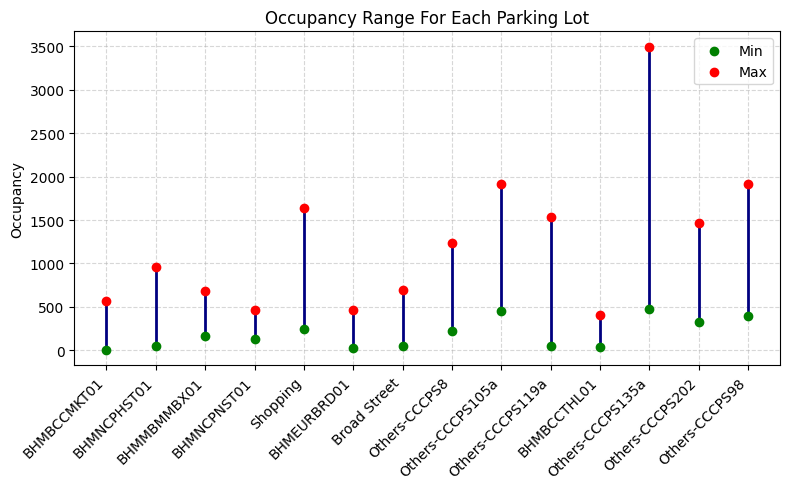

In [13]:
# ------ Plotting the range of occupancy for each parking lot

lot_names = []
min_values = []
max_values = []

for lot in lots:
    lot_data = urban_lots[urban_lots['SystemCodeNumber'] == lot]['Occupancy']
    lot_names.append(str(lot))
    min_values.append(lot_data.min())
    max_values.append(lot_data.max())

occupancy_ranges = list(zip(min_values, max_values))

fig, ax = plt.subplots(figsize=(8, 5))

for i, (min_val, max_val) in enumerate(occupancy_ranges):
    ax.plot([i, i], [min_val, max_val], color='navy', linewidth=2)
    ax.scatter(i, min_val, color='green', label='Min' if i == 0 else "", zorder=3)
    ax.scatter(i, max_val, color='red', label='Max' if i == 0 else "", zorder=3)

ax.set_xticks(range(len(lot_names)))
ax.set_xticklabels(lot_names, rotation=45, ha='right')
ax.set_ylabel('Occupancy')
ax.set_title('Occupancy Range For Each Parking Lot')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

In [14]:
# ------ Plotting the occupancy rate over time for each parking lot

lots = urban_lots['SystemCodeNumber'].unique()
palette = Category20[max(3, len(lots))]

p = figure(x_axis_type='datetime',
           width=1050, height=500,
           title="Occupancy Trend Over Time by Parking Lot",
           x_axis_label='Time', y_axis_label='Occupancy')

legend_items = []

for i, lot in enumerate(lots):
    lot_data = urban_lots[urban_lots['SystemCodeNumber'] == lot].sort_values('Timestamp')
    line = p.line(x=lot_data['Timestamp'], y=lot_data['Occupancy'],
                  line_width=2, color=palette[i])
    legend_items.append((str(lot), [line]))

legend = Legend(items=legend_items, title="Parking Lots")
p.add_layout(legend, 'right')
p.legend.click_policy = "hide"

show(p)

## **VehicleType Trends**

In [15]:
urban_lots['VehicleType'].value_counts()

,count
VehicleType,
car,11166
bike,3624
truck,1809
cycle,1769


In [16]:
vehicle_counts_per_lot = urban_lots.groupby(['SystemCodeNumber', 'VehicleType']).size().unstack(fill_value=0)
vehicle_counts_per_lot

VehicleType,bike,car,cycle,truck
SystemCodeNumber,,,,
BHMBCCMKT01,258,806,122,126
BHMBCCTHL01,274,774,127,137
BHMEURBRD01,245,811,119,137
BHMMBMMBX01,256,791,114,151
BHMNCPHST01,266,784,131,131
BHMNCPNST01,247,824,127,114
Broad Street,260,806,131,115
Others-CCCPS105a,264,804,117,127
Others-CCCPS119a,276,774,134,128


## **TrafficConditionNearby Trends**

In [17]:
urban_lots['TrafficConditionNearby'].value_counts()

,count
TrafficConditionNearby,
low,7793
average,6438
high,4137


In [18]:
traffic_cndn_per_lot = urban_lots.groupby(['SystemCodeNumber', 'TrafficConditionNearby']).size().unstack(fill_value=0)
traffic_cndn_per_lot

TrafficConditionNearby,average,high,low
SystemCodeNumber,,,
BHMBCCMKT01,460,298,554
BHMBCCTHL01,481,292,539
BHMEURBRD01,456,293,563
BHMMBMMBX01,465,296,551
BHMNCPHST01,473,294,545
BHMNCPNST01,433,311,568
Broad Street,485,279,548
Others-CCCPS105a,474,298,540
Others-CCCPS119a,447,305,560


All lots seem to have similar p

## **QueueLength Trends**

In [19]:
urban_lots['QueueLength'].min(), urban_lots['QueueLength'].max()

(0, 15)

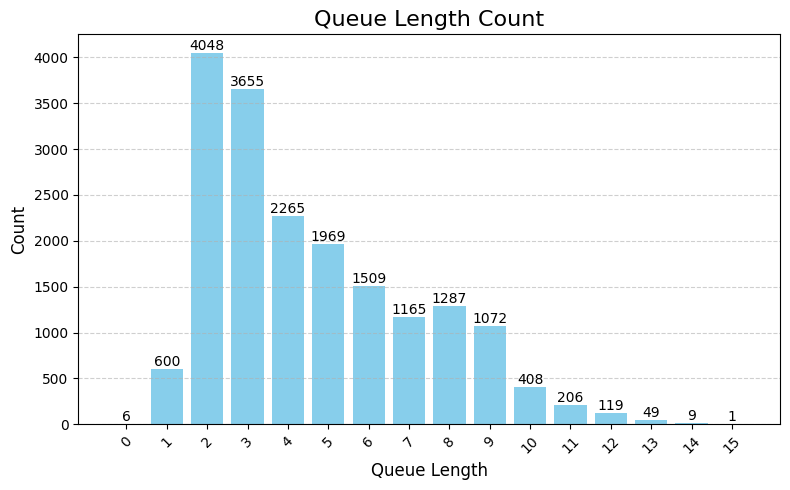

In [20]:
# ------ Checking queue length distribution

queue_counts = urban_lots['QueueLength'].value_counts().sort_index()

plt.figure(figsize=(8, 5))
bars = plt.bar(queue_counts.index.astype(str), queue_counts.values, color='skyblue')

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title("Queue Length Count", fontsize=16)
plt.xlabel("Queue Length", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [21]:
queue_len_per_lot = urban_lots.groupby(['SystemCodeNumber', 'QueueLength']).size().unstack(fill_value=0)
queue_len_per_lot

QueueLength,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
SystemCodeNumber,,,,,,,,,,,,,,,,
BHMBCCMKT01,5,203,343,183,165,118,83,143,37,24,7,1,0,0,0,0
BHMBCCTHL01,0,78,354,214,181,162,48,134,98,4,23,14,2,0,0,0
BHMEURBRD01,1,80,366,223,172,147,87,90,119,23,2,2,0,0,0,0
BHMMBMMBX01,0,28,320,263,162,143,110,63,134,51,18,17,2,1,0,0
BHMNCPHST01,0,36,317,233,196,114,129,46,123,87,17,7,7,0,0,0
BHMNCPNST01,0,56,375,229,155,158,66,168,67,12,23,3,0,0,0,0
Broad Street,0,46,338,251,171,135,118,52,126,66,6,2,1,0,0,0
Others-CCCPS105a,0,4,210,299,147,159,133,58,62,147,57,4,15,15,2,0
Others-CCCPS119a,0,36,336,231,160,122,114,69,143,64,7,14,14,2,0,0


In [22]:
# ------ Plotting the queue length over time for each parking lot

lots = urban_lots['SystemCodeNumber'].unique()
palette = Category20[max(3, len(lots))]

p = figure(x_axis_type='datetime',
           width=1050, height=500,
           title="Queue Length Trend Over Time by Parking Lot",
           x_axis_label='Time', y_axis_label='QueueLength')

legend_items = []

for i, lot in enumerate(lots):
    lot_data = urban_lots[urban_lots['SystemCodeNumber'] == lot].sort_values('Timestamp')
    line = p.line(x=lot_data['Timestamp'], y=lot_data['QueueLength'],
                  line_width=2, color=palette[i])
    legend_items.append((str(lot), [line]))

legend = Legend(items=legend_items, title="Parking Lots")
p.add_layout(legend, 'right')
p.legend.click_policy = "hide"

show(p)

## **SpecialDay Attribute**

- 0 --> Non-special day
- 1 --> Special day

In [23]:
urban_lots['IsSpecialDay'].value_counts()

,count
IsSpecialDay,
0,15596
1,2772


In [24]:
special_days_per_lot = urban_lots.groupby(['SystemCodeNumber', 'IsSpecialDay']).size().unstack(fill_value=0)
special_days_per_lot

IsSpecialDay,0,1
SystemCodeNumber,,
BHMBCCMKT01,1114,198
BHMBCCTHL01,1114,198
BHMEURBRD01,1114,198
BHMMBMMBX01,1114,198
BHMNCPHST01,1114,198
BHMNCPNST01,1114,198
Broad Street,1114,198
Others-CCCPS105a,1114,198
Others-CCCPS119a,1114,198


# **Conclusions**

1. The vehicle type can be used to influence the price.  **(larger the vehicle, higher the price)**
2. Higher occupancy indicates a higher demand, therefore **prices can be increased with increasing occupancy**. (Should be normalized by per lot capacity)

# **Processing Lots Individually**

In [72]:
import os

os.makedirs("lots_csv", exist_ok=True)

lot_files = dict()

for system_code, group in urban_lots.groupby("SystemCodeNumber"):
    filename = f"lots_csv/{system_code}.csv"
    group.to_csv(filename, index=False)
    lot_files[system_code] = filename
    print(f"Saved {filename} with {len(group)} records")

Saved lots_csv/BHMBCCMKT01.csv with 1312 records
Saved lots_csv/BHMBCCTHL01.csv with 1312 records
Saved lots_csv/BHMEURBRD01.csv with 1312 records
Saved lots_csv/BHMMBMMBX01.csv with 1312 records
Saved lots_csv/BHMNCPHST01.csv with 1312 records
Saved lots_csv/BHMNCPNST01.csv with 1312 records
Saved lots_csv/Broad Street.csv with 1312 records
Saved lots_csv/Others-CCCPS105a.csv with 1312 records
Saved lots_csv/Others-CCCPS119a.csv with 1312 records
Saved lots_csv/Others-CCCPS135a.csv with 1312 records
Saved lots_csv/Others-CCCPS202.csv with 1312 records
Saved lots_csv/Others-CCCPS8.csv with 1312 records
Saved lots_csv/Others-CCCPS98.csv with 1312 records
Saved lots_csv/Shopping.csv with 1312 records


In [73]:
lot_files

{'BHMBCCMKT01': 'lots_csv/BHMBCCMKT01.csv',
 'BHMBCCTHL01': 'lots_csv/BHMBCCTHL01.csv',
 'BHMEURBRD01': 'lots_csv/BHMEURBRD01.csv',
 'BHMMBMMBX01': 'lots_csv/BHMMBMMBX01.csv',
 'BHMNCPHST01': 'lots_csv/BHMNCPHST01.csv',
 'BHMNCPNST01': 'lots_csv/BHMNCPNST01.csv',
 'Broad Street': 'lots_csv/Broad Street.csv',
 'Others-CCCPS105a': 'lots_csv/Others-CCCPS105a.csv',
 'Others-CCCPS119a': 'lots_csv/Others-CCCPS119a.csv',
 'Others-CCCPS135a': 'lots_csv/Others-CCCPS135a.csv',
 'Others-CCCPS202': 'lots_csv/Others-CCCPS202.csv',
 'Others-CCCPS8': 'lots_csv/Others-CCCPS8.csv',
 'Others-CCCPS98': 'lots_csv/Others-CCCPS98.csv',
 'Shopping': 'lots_csv/Shopping.csv'}

In [78]:
class ParkingSchema(pw.Schema):
    Timestamp: str
    Occupancy: int
    Capacity: int

# **Linear Model Logic**

Condition has been given that the price shouldn't be less than 0.5 times base price and not greater than 2 times the base price, so the value of alpha can be set accordingly. **[Between 5 Rs and 20 Rs]**

In order to make the price go up and down based on the occupancy levels, a "symmetric model" can be used where;
1. If the demand is high, the price increases by a certain amount.
2. If the demand is low by the same degree, the price decreases by the same amount.

The model is symmetric around a central point which in this case is the base price.

The formula is the following:

$$
\text{Price} = \text{base_price} + \alpha \cdot \left(2 \cdot \frac{\text{occ}_{\text{max}} - \text{occ}_{\text{min}}}{\text{cap}} - 1\right) \\
$$

Multiplication by 2 is done in order to set the range of [occ(max) - occ(min)]/cap to [-1, 1].

In order to ensure that the value of price stays within range, the suitable value for alpha is;

$$
\alpha = 5
$$

In [98]:
base_price = 10
alpha = 5

In [97]:
fmt = "%Y-%m-%d %H:%M:%S"

In [100]:
def make_plotter(lot_label):
    def plotter(source):
        fig = bokeh.plotting.figure(
            height=400,
            width=800,
            title=f"Daily Price for Lot: {lot_label}",
            x_axis_type="datetime"
        )
        fig.line("t", "price", source=source, line_width=2, color="navy")
        fig.scatter("t", "price", source=source, size=6, color="red")
        return fig
    return plotter

In [101]:
figures = []

In [106]:
window_tables = dict()

for lot_id, file_path in lot_files.items():
  raw_data = pw.demo.replay_csv(file_path, schema=ParkingSchema, input_rate=100)

  data_with_time = raw_data.with_columns(
      t = raw_data.Timestamp.dt.strptime(fmt),
      day = raw_data.Timestamp.dt.strptime(fmt).dt.strftime("%Y-%m-%dT00:00:00"),
  )

  delta_window = (
      data_with_time.windowby(
          pw.this.t,
          instance=pw.this.day,
          window=pw.temporal.tumbling(datetime.timedelta(days=1)),
          behavior=pw.temporal.exactly_once_behavior()
      )
      .reduce(
          t = pw.this._pw_window_end,
          occ_max = pw.reducers.max(pw.this.Occupancy),
          occ_min = pw.reducers.min(pw.this.Occupancy),
          cap = pw.reducers.max(pw.this.Capacity),
      )
      .with_columns(
          price = base_price + alpha * ((2 * (pw.this.occ_max - pw.this.occ_min) / pw.this.cap) - 1)
      )
  )

  window_tables[lot_id] = delta_window

  viz = delta_window.plot(make_plotter(lot_id), sorting_col="t")
  figures.append(pn.Column(viz))

In [110]:
len(window_tables)

14

# **Lot-wise Demand-based Price Prediction**

In [107]:
pn.Column(*figures).servable()

Column
    [0] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [1] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [2] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [3] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [4] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [5] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [6] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [7] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [8] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [9] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [10] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [11] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [12] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [13] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [14] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [15] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [16] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [17] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [18] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [19] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [20] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [21] Column
        [0] Column
            [0] Row
                [0] Markdown(str)
                [1] TooltipIcon(value='Table depends o...)
            [1] Bokeh(figure)
    [22] Column
        [0] Column
            [0] Row
                [0] Markdown(str

In [111]:
%%capture --no-display
pw.run()

Output()